## Two layer network with TensorFlow
We will build upon our previous task of logistic regression to create a two layer network. This time we will use
entire data and not only restricted to two species type. Simultaneously we will not do batch training this time

## 1. Load necessary libraries
Loading libraries, rading data, and having a look at the data

In [1]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize
from datetime import datetime

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
iris = pd.read_csv('iris.csv',index_col = 0)
iris.head()
print(iris.shape)
print(iris.head())



(150, 5)
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa


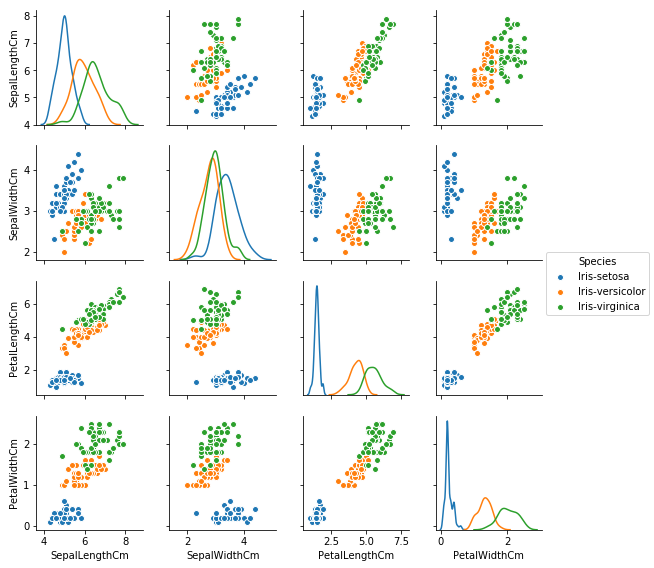

In [3]:
#Plot the dataset
seaborn.pairplot(iris, hue="Species", size=2, diag_kind="kde")
plt.show()



## 2. Multi-class classification
In the previous exercise we worked with binary classification. In this example we work with multi-class

In [4]:
## this code is not needed anymore
'''
iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])
'''

"\niris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])\n"

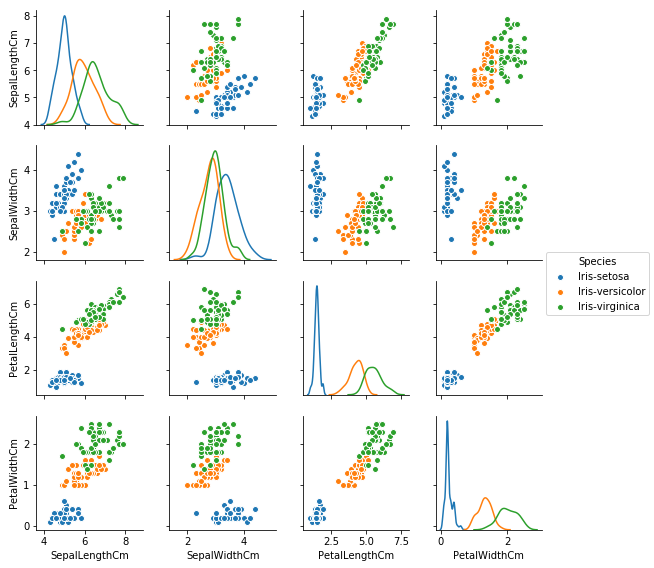

In [5]:
## Previously we made plotted only a single plot for one variable. Let's extend this to
## all pairwise plots
'''
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:].SepalLengthCm, iris[51:].SepalWidthCm, label='Iris-versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')
#Plot the dataset
'''
seaborn.pairplot(iris, hue="Species", size=2, diag_kind="kde")
plt.show()

In [6]:
species_lb = LabelBinarizer()
Y = species_lb.fit_transform(iris.Species.values)

## 2.1 Prepare features
Here we extract our features and output variable seperately. The features are normalized. 
Notice the difference to previous normalization we did?


In [7]:
## Previous code
'''
# For simplicity we use min, max normalization. Defining a function for that
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
X_train = min_max_normalized(X_train)
X_test = min_max_normalized(X_test)

'''
from sklearn.preprocessing import normalize
FEATURES = iris.columns[0:4]
X_data = iris[FEATURES].as_matrix()
## normalize data to have unit form



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


## 3. Normalize data
In the last exercise we did min, max normalization after train-test split
this time we normalize before split

In [8]:
X_data = normalize(X_data)

## 4. Split data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.3, random_state=1)
X_train.shape

(105, 4)

## 5. Building the model framework

# 5.1 Model parameters
Model parameters like learning rate, number of epochs, number of neurons in two hidden layers is define here

In [10]:
#TO DO: initialize parameters
# Parameters
learning_rate =
## this time we learn without batch
'''
batch_size = 30
'''
training_epochs = 

## TO DO: initialize neural network parameters
# Neural Network Parameters
n_input = ??? # input shape (105, 4)
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons
## we did not use n_classes in the last example as we only had two classes in one column
n_classes = ??? # classes to predict




## 5.2 Define placeholders, and intialize weights
Pleaseholders are (you can think of them as something like empty variables) used to supply data arguements
when running a model in TF. We define here two placeholders one for data (i.e. features) and second for target (i.e.) output variable

Along with that we intialize weights by performing sampling from a random normal distribution. Since we have two hidden layers, we need two set of weight. While defininig weights and biases it is important that the matrix
dimentions are taken care of. 

In [11]:
'''
data = tf.placeholder(dtype=tf.float32, shape=[None, n_input])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Begin building the model framework
# Declare the variables that need to be learned and initialization
# W is for weights and b for bias. Since we have 4 features (we need for weights) and similarly one bias
W = tf.Variable(tf.random_normal(shape=[n_input, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
'''

data = tf.placeholder("float", shape=[None, n_input])
target = tf.placeholder("float", shape=[None, n_classes])

# Dictionary of Weights and Biases
#TO DO: define the missing placeholders
weights = {
  'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
  'h2': ??? ,
  'out': ???
}

biases = {
  'b1': tf.Variable(tf.random_normal([n_hidden_1])),
  'b2': ???,
  'out': ???
}



## 5.3 Define forward propogation step
In the last exercise we first defined sessions and then created a model using __mod = tf.matmul(data, W) + b__

This time we do not create such a model, rather define forward pass. Which basically involves matrix multiplications at all layers of the network.

As you can see that at every layer, we first multiply weights and input and then add bias. The process can be repeated to add as many layers as we like i.e. basically make our network more dense if we like.



In [12]:
# Model Forward Propagation step
def forward_propagation(x):
    # Hidden layer1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Output fully connected layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] 
    return out_layer

In [13]:
## Code from lostic regression
'''
# Declare the model you need to learn
mod = tf.matmul(data, W) + b
'''

'\n# Declare the model you need to learn\nmod = tf.matmul(data, W) + b\n'

## Runnign forward pass

In [14]:
# Model Outputs
yhat = forward_propagation(data)
ypredict = tf.argmax(yhat, axis=1)

## 5.4 Backward pass, loss and optimizer
- Similar to lostic regression we define a cost (or loss function)
- Define an optimizer
- What to optimize? Our goal
- Initialize globar variables i.e. our weights and biases

In [15]:
'''
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

# Define the optimizer, optimizer needs an argument, which one is it? 
opt = tf.train.GradientDescentOptimizer(learning_rate)
# here we define the goal i.e. what do we want to optimize and how. How has been defined in opt above
goal = opt.minimize(loss)
'''

# Backward propagation
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=yhat))
opt = tf.train.GradientDescentOptimizer(learning_rate)
#opt = tf.train.AdamOptimizer(learning_rate=learning_rate)

goal = opt.minimize(loss)

# Initializing the variables
init = tf.global_variables_initializer()



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



## 6. Running the model

In [16]:
#TO DO: Set the for loops argument correctly
startTime = datetime.now()

with tf.Session() as sess:
    sess.run(init)
    
    #writer.add_graph(sess.graph)
    #EPOCHS
    for epoch in range(???):
        #Stochasting Gradient Descent
        for i in range(len(???)):
            summary = sess.run(goal, feed_dict={data: X_train[i: i + 1], target: y_train[i: i + 1]})
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == sess.run(ypredict, feed_dict={data: X_train, target: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == sess.run(ypredict, feed_dict={data: X_test, target: y_test}))
                
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
        #print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy))

    sess.close()
print("Time taken:", datetime.now() - startTime)

Epoch = 1, train accuracy = 69.52%, test accuracy = 60.00%
Epoch = 2, train accuracy = 80.95%, test accuracy = 64.44%
Epoch = 3, train accuracy = 90.48%, test accuracy = 88.89%
Epoch = 4, train accuracy = 89.52%, test accuracy = 88.89%
Epoch = 5, train accuracy = 91.43%, test accuracy = 93.33%
Epoch = 6, train accuracy = 89.52%, test accuracy = 91.11%
Epoch = 7, train accuracy = 89.52%, test accuracy = 93.33%
Epoch = 8, train accuracy = 92.38%, test accuracy = 91.11%
Epoch = 9, train accuracy = 91.43%, test accuracy = 91.11%
Epoch = 10, train accuracy = 89.52%, test accuracy = 91.11%
Epoch = 11, train accuracy = 91.43%, test accuracy = 93.33%
Epoch = 12, train accuracy = 91.43%, test accuracy = 93.33%
Epoch = 13, train accuracy = 92.38%, test accuracy = 91.11%
Epoch = 14, train accuracy = 92.38%, test accuracy = 91.11%
Epoch = 15, train accuracy = 92.38%, test accuracy = 93.33%
Epoch = 16, train accuracy = 92.38%, test accuracy = 95.56%
Epoch = 17, train accuracy = 92.38%, test accurac